In [1]:
from utils import get_fichero, read_file, generar_permutador, funcion_f, tiempo_final_f
import seleccion
import matplotlib.pyplot as plt
import cruces

In [2]:
NIND = 20
NGEN = 100
NFILE = 8
MUPB = 0.2
CXPB = 0.8

file = get_fichero(NFILE)
d = read_file(file)

In [3]:
# INICIO
individuos = []
fitness = []

for i in range(NIND):
    permutador = generar_permutador(d)
    individuos.append(permutador)
    fitness.append(tiempo_final_f(funcion_f(permutador,d)))
    
for i in individuos[0:3]:
    print("- ", i)
print("...")
for i in individuos[-4:-1]:
    print("- ", i)

-  [1, 56, 71, 85, 44, 97, 55, 12, 74, 67, 19, 11, 79, 2, 83, 82, 18, 95, 76, 77, 41, 81, 84, 78, 34, 87, 20, 9, 89, 70, 23, 37, 94, 72, 98, 96, 52, 31, 17, 68, 64, 14, 62, 53, 6, 92, 58, 48, 8, 26, 16, 36, 73, 49, 25, 65, 22, 15, 32, 86, 27, 50, 5, 43, 66, 93, 59, 63, 60, 54, 28, 13, 75, 42, 61, 38, 35, 39, 7, 24, 46, 88, 29, 45, 40, 3, 10, 99, 47, 69, 51, 57, 0, 91, 33, 4, 21, 90, 80, 30]
-  [5, 50, 67, 51, 0, 71, 96, 2, 90, 99, 16, 25, 42, 34, 78, 83, 26, 7, 95, 62, 37, 57, 56, 52, 60, 43, 12, 66, 23, 54, 77, 6, 72, 27, 82, 31, 87, 3, 15, 89, 55, 48, 35, 68, 21, 58, 88, 38, 65, 33, 70, 8, 45, 32, 40, 61, 18, 97, 80, 92, 86, 59, 39, 13, 79, 81, 29, 10, 84, 63, 19, 94, 76, 17, 73, 69, 74, 28, 93, 85, 1, 14, 98, 36, 53, 46, 44, 49, 75, 11, 24, 47, 4, 64, 30, 20, 9, 22, 91, 41]
-  [97, 62, 20, 76, 86, 19, 5, 8, 51, 63, 64, 26, 70, 10, 71, 80, 21, 85, 69, 59, 39, 60, 9, 46, 13, 99, 0, 35, 30, 45, 82, 22, 23, 68, 73, 2, 31, 1, 84, 75, 90, 14, 58, 15, 38, 29, 65, 33, 96, 37, 87, 91, 4, 66,

593

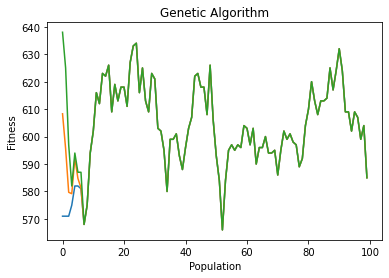

In [4]:
'''
GENETICO
'''

def genetic(d=d, NIND=NIND, NGEN=NGEN, MUPB=MUPB, CXPB=CXPB, ox=True, plot=False, seleccion:int=1):
    individuos = []
    retorno = []
    bestfit = -1
    dmin, davg, dmax = [], [], []
    
    
    for i in range(NIND):
        individuos.append(generar_permutador(d))
    
    for i in range(NGEN):
        fitness = []
        for i in individuos:
            fitness.append(tiempo_final_f(funcion_f(i, d)))
        
        aux = min(fitness)
        if bestfit > aux or bestfit == -1:
            bestfit = aux
            retorno = individuos[fitness.index(bestfit)]
        dmin.append(min(fitness))
        davg.append(sum(fitness)/len(fitness))
        dmax.append(max(fitness))

        if seleccion == 1:
            individuos = seleccion.ruleta(individuos=individuos, fitness=fitness, seleccionados=NIND)
        elif seleccion == 2:
            individuos = seleccion.torneo(individuos=individuos, fitness=fitness, seleccionados=NIND)
        elif seleccion == 3:
            individuos = seleccion.ranking(individuos=individuos, fitness=fitness, seleccionados=NIND)
            
        individuos.extend(cruces.cruce(individuos = individuos, ox=ox, CXPB=CXPB))
        cruces.mutacion(individuos=individuos, MUPB=MUPB, times = 1)
    
    if plot:
        plt.plot(list(range(len(dmin))), dmin)
        plt.plot(list(range(len(davg))), davg)
        plt.plot(list(range(len(dmax))), dmax)
        
        plt.xlabel('Population')
        plt.ylabel('Fitness')
        
        plt.title('Genetic Algorithm')
    
    return retorno

tiempo_final_f(funcion_f(genetic(ox=False, plot=True), d))
